Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.  Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

np.corrcoef(garage, street)[0,1]

-0.9999999999999998

Коэффициент корреляции практически равен –1, что означает сильную отрицательную корреляцию, то есть при увеличении машин в гараже, означает уменьшение их на улице и наоборот.

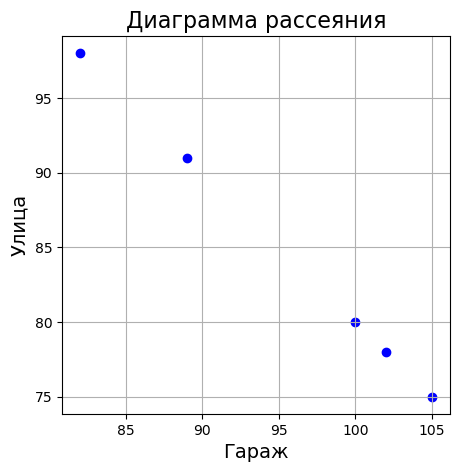

In [19]:
f = plt.figure(figsize=(5,5), dpi = 100)
plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize = 16)
plt.xlabel('Гараж', fontsize = 14)
plt.ylabel('Улица', fontsize = 14)
plt.scatter(garage, street, color='blue')

In [25]:
import pandas as pd 
data = pd.read_csv('bitcoin.csv', sep = ',')
df = pd. DataFrame(data)
df.isna().sum()

Unnamed: 0    0
time          0
high          0
low           0
open          0
volumefrom    0
volumeto      0
close         0
dtype: int64

Предсказать стоимость криптовалюты за последние 14 дней с помощью линейной регрессии.  За независимую переменную возьмем столбец «open», за зависимую, очевидно, «Predict». На основе данных, содержащих все значения, за исключением последних 14, обучим модель и сделаем предсказание.

In [30]:
hide = 14
df['predict'] = df['open'].shift(-hide)
df.head()

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close,predict
0,0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78,433.72
1,1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59,430.70
2,2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03,433.32
3,3,2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43,431.20
4,4,2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98,430.82


In [48]:
import sklearn.linear_model as sk
df_tst = df.dropna()
x = pd.DataFrame(df_tst, columns=['open'])
y = pd.DataFrame(df_tst, columns=['predict'])
x = np.array(x, type(float))
y = np.array(y, type(float))
regression = sk.LinearRegression()
reg = regression.fit(x,y)
df_predict = df[df['predict'].isna()]
res = np.array(df_predict['open']).reshape(-1,1)
df_predict['predict'] = reg.predict(res)
df_predict

[[35680.92]
 [34611.58]
 [35662.59]
 [37290.83]
 [36683.51]
 [37576.98]
 [39229.66]
 [36861.5 ]
 [35538.4 ]
 [35798.57]
 [33582.86]
 [33409.38]
 [37391.58]
 [36680.78]]


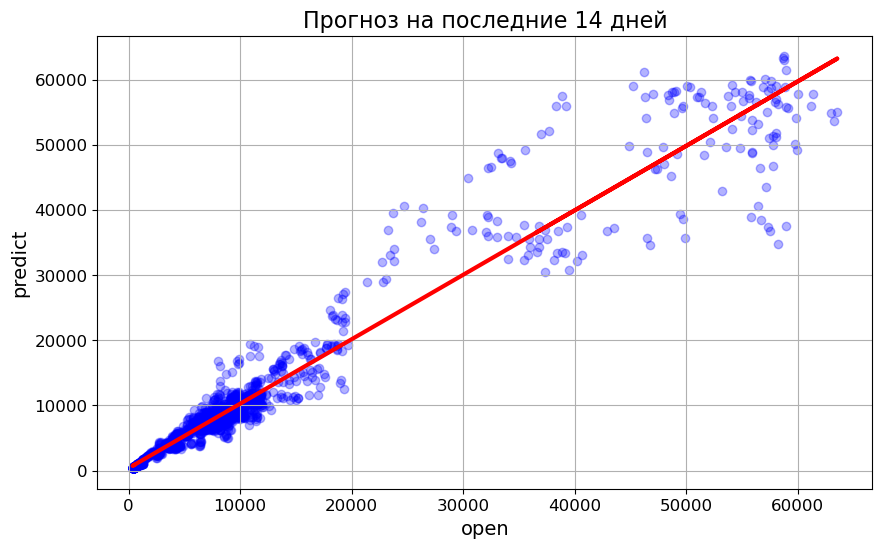

In [39]:
x = pd.DataFrame(df, columns=['open'])
x = np.array(x, type(float))
y = pd.DataFrame(df, columns=['predict'])
y = np.array(y, type(float))

plt.figure(figsize=(10,6), dpi= 100)
plt.grid(visible=True)
plt.scatter(x,y, alpha=0.3, color='blue')
plt.plot(x, reg.predict(x), color='red', linewidth=3)
plt.title('Прогноз на последние 14 дней', fontsize = 16)
plt.xlabel('open', fontsize = 14)
plt.ylabel('predict', fontsize = 14)
plt.tick_params(labelsize = 'large')
plt.show()

Диаграмма рассеивания с предсказанными значениями приближена к графику зависимости известного предсказания от значений "open", что означает эффективность предсказания.

Вывести угол наклона и y-перехват.

In [51]:
print('Перехват', reg.intercept_)
print('Наклон', reg.coef_)

Перехват [354.17978208]
Наклон [[0.9888406]]
